In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier  # MLP is an NN
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import svm
from skimage.feature import hog
import numpy as np
import argparse
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import skimage.io as io



In [144]:
path_to_b_dataset = r'letters_data_set/B'
path_to_e_dataset = r'letters_data_set/E'
path_to_m_dataset = r'letters_data_set/M'
path_to_s_dataset = r'letters_data_set/S'
path_to_y_dataset = r'letters_data_set/Y'
SVM = SVC(verbose=True)
random_seed=20
best_svm_model = None

In [153]:
def extract_hog_features(img): 
    img = cv2.resize(img, (64, 64))
    win_size = (32, 32)
    cell_size = (4, 4)
    block_size_in_cells = (2, 2)
    
    block_size = (block_size_in_cells[1] * cell_size[1], block_size_in_cells[0] * cell_size[0])
    block_stride = (cell_size[1], cell_size[0])
    nbins = 12 

    fd, hog_image = hog(
        img,
        # pixels_per_cell=(2, 2),
        pixels_per_cell=(4, 4),
        cells_per_block=(4, 4),
        # cells_per_block=(2, 2),
        visualize=True,
        # channel_axis=2
    )
    return fd,hog_image
    # hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
    # h = hog.compute(img)
    # return h.flatten()

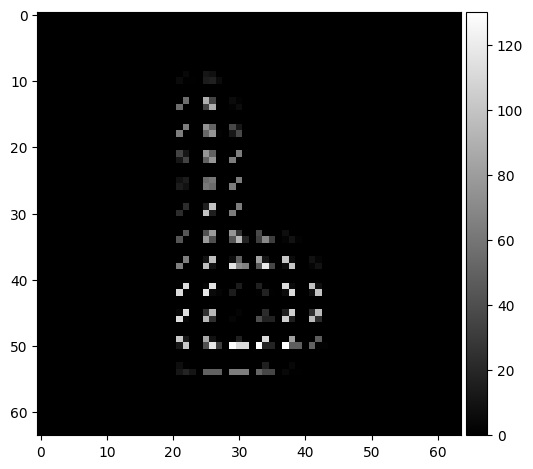

In [154]:
test=io.imread("../classification/letters_data_set/B/test7.png")
fd,hog_image=extract_hog_features(test)
io.imshow(hog_image,cmap='gray')    

In [147]:
def load_dataset():
    features = []
    labels = []
    img_filenames_b = os.listdir(path_to_b_dataset)
    img_filenames_e = os.listdir(path_to_e_dataset)
    img_filenames_m = os.listdir(path_to_m_dataset)
    img_filenames_s = os.listdir(path_to_s_dataset)
    img_filenames_y = os.listdir(path_to_y_dataset)


    for i, fn in enumerate(img_filenames_b):
        if fn.split('.')[-1] != 'png' and fn.split('.')[-1]!='jpg':
            continue

        label = 'B'
        labels.append(label)

        path = os.path.join(path_to_b_dataset, fn)
        img = io.imread(path)
        fd, _= extract_hog_features(img)
        features.append(fd)
        
        # show an update every 10 images
        if i > 0 and i % 10 == 0:
            print("[INFO] processed {}/{}".format(i, len(img_filenames_b)))
    print("B dataset processing done")
    for i, fn in enumerate(img_filenames_e):
        if fn.split('.')[-1] != 'png' and fn.split('.')[-1]!='jpg':
            continue

        label = 'E'
        labels.append(label)

        path = os.path.join(path_to_e_dataset, fn)
        img = io.imread(path)
        fd, _= extract_hog_features(img)
        features.append(fd)
        
        # show an update every 10 images
        if i > 0 and i % 10 == 0:
            print("[INFO] processed {}/{}".format(i, len(img_filenames_e)))     
    print("E dataset processing done")   
    
    for i, fn in enumerate(img_filenames_m):
        if fn.split('.')[-1] != 'png' and fn.split('.')[-1]!='jpg':
            continue

        label = 'M'
        labels.append(label)

        path = os.path.join(path_to_m_dataset, fn)
        img = io.imread(path)
        fd, _= extract_hog_features(img)
        features.append(fd)
        
        # show an update every 10 images
        if i > 0 and i % 10 == 0:
            print("[INFO] processed {}/{}".format(i, len(img_filenames_m)))     
    print("M dataset processing done")   
    
    for i, fn in enumerate(img_filenames_s):
        if fn.split('.')[-1] != 'png' and fn.split('.')[-1]!='jpg':
            continue

        label = 'S'
        labels.append(label)

        path = os.path.join(path_to_s_dataset, fn)
        img = io.imread(path)
        fd, _= extract_hog_features(img)
        features.append(fd)
        
        # show an update every 10 images
        if i > 0 and i % 10 == 0:
            print("[INFO] processed {}/{}".format(i, len(img_filenames_s)))     
    print("S dataset processing done")   
    
    for i, fn in enumerate(img_filenames_y):
        if fn.split('.')[-1] != 'png' and fn.split('.')[-1]!='jpg':
            continue

        label = 'Y'
        labels.append(label)

        path = os.path.join(path_to_y_dataset, fn)
        img = io.imread(path)
        fd, _= extract_hog_features(img)
        features.append(fd)
        
        # show an update every 10 images
        if i > 0 and i % 10 == 0:
            print("[INFO] processed {}/{}".format(i, len(img_filenames_y)))     
    print("Y dataset processing done")   
    

    return features, labels        

In [155]:
def train():
  
    # Load dataset with extracted features
    print('Loading dataset. This will take time ...')
    features, labels = load_dataset()
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    print('Finished loading dataset.')
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    param_grid = {
   #  'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf'],
   #  'kernel': ['rbf', 'sigmoid'],
   #  'degree': [1, 2, 3],
   #  'gamma': ['scale', 'auto', 0.1, 1, 10]
    }
    grid_search = GridSearchCV(SVM, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)

    
 # Train the SVM model with the best parameters
    best_svm_model = SVC(verbose=True,probability=True,**best_params)
    best_svm_model.fit(X_train_scaled, y_train)

   # Make predictions on the test set
    y_pred = best_svm_model.predict(X_test_scaled)

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    return best_svm_model

In [156]:
best_svm_model=train()

Loading dataset. This will take time ...
[INFO] processed 10/149
[INFO] processed 20/149
[INFO] processed 30/149
[INFO] processed 40/149
[INFO] processed 50/149
[INFO] processed 60/149
[INFO] processed 70/149
[INFO] processed 80/149
[INFO] processed 90/149
[INFO] processed 100/149
[INFO] processed 110/149
[INFO] processed 120/149
[INFO] processed 130/149
[INFO] processed 140/149
B dataset processing done
[INFO] processed 10/146


KeyboardInterrupt: 

In [ ]:
model_pkl_file = "letters_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(KNN, file)

In [150]:
letters=['B','E','M','S','Y']
def natural_sort_key(s):
    """Key function for natural sorting."""
    import re
    return [int(text) if text.isdigit() else text.lower() for text in re.split(r'(\d+)', s)]
output_file_path = 'results.txt'
path_to_testset = r'testset3'
filenames = sorted(os.listdir(path_to_testset), key=natural_sort_key)
with open(output_file_path, 'w') as output_file:
    for i, fn in enumerate(filenames):
        if fn.split('.')[-1] != 'png' and fn.split('.')[-1]!='jpg':
            continue
        image=io.imread(os.path.join(path_to_testset, fn))
        image=cv2.resize(image,(64,64))
        features = extract_hog_features(image)
        pred = best_svm_model.predict([features])
        result = f"{fn} {letters[np.argmax(pred)]}\n"
        print(pred)
        print(result)  
        output_file.write(result)
    
# features=extract_hog_features(cv2.imread('test.png'))
# pred=SVM.predict_proba([features])
# print(np.argmax(pred))

AttributeError: 'NoneType' object has no attribute 'predict'